Step 1. Read dataset and combine into 1 dataframe

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df1 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part1.csv')
df2 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part2.csv')
df3 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part3.csv')
df4 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part4.csv')
df5 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part5.csv')
df6 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part6.csv')
df7 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part7.csv')

df = pd.concat([df1, df2, df3, df4, df5, df6, df7])
df

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
0,0.0,3.90,745.0,18712.0,10250.0,11576.0,64.0,11855.0,967.0,611.0,...,279.0,458.0,183.0,158.0,198.0,87.0,296.0,505.0,307.0,0.0
1,0.0,0.66,749.0,11239.0,6313.0,4712.0,64.0,18968.0,1133.0,447.0,...,144.0,334.0,290.0,228.0,187.0,213.0,202.0,89.0,103.0,0.0
2,1.0,7.86,746.0,4355.0,5240.0,3478.0,60.0,14699.0,894.0,723.0,...,32.0,373.0,224.0,174.0,124.0,329.0,207.0,96.0,218.0,0.0
3,1.0,3.48,750.0,8502.0,8416.0,5890.0,76.0,8748.0,1127.0,1024.0,...,252.0,173.0,198.0,160.0,434.0,397.0,290.0,155.0,342.0,256.0
4,0.0,1.19,746.0,17845.0,18095.0,12058.0,68.0,11380.0,1744.0,276.0,...,154.0,209.0,242.0,296.0,87.0,178.0,314.0,247.0,292.0,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,2.43,745.0,12960.0,17703.0,14948.0,96.0,9987.0,2379.0,276.0,...,180.0,156.0,322.0,378.0,115.0,296.0,452.0,138.0,123.0,0.0
5996,0.0,1.39,745.0,2235.0,15089.0,8796.0,76.0,12559.0,1810.0,281.0,...,43.0,433.0,517.0,518.0,287.0,169.0,437.0,59.0,296.0,0.0
5997,1.0,5.48,747.0,7115.0,6262.0,4584.0,72.0,1435.0,1092.0,1024.0,...,394.0,475.0,262.0,468.0,247.0,192.0,395.0,335.0,284.0,256.0
5998,1.0,3.40,745.0,6662.0,7683.0,5600.0,72.0,1491.0,1077.0,1024.0,...,397.0,170.0,231.0,231.0,202.0,253.0,128.0,311.0,290.0,0.0


Step 2. Check data for any missing or null values

In [3]:
# Check for missing values in each column across the whole dataset, if there are any missing values, return True
missing_values = df.isnull().isna().any().any()
missing_values

False

Step 3. Perform aggregation on CIR columns to obtain summary of features

Can explore more options such as ToA, path dominance, decay rate as well as clustering

In [4]:
# Filter the dataset to only include the CIR columns containing the channel impulse response data
cir_df = df.drop(df.iloc[:, :15], axis=1).copy()
cir_df

,CIR0,CIR1,CIR2,CIR3,CIR4,CIR5,CIR6,CIR7,CIR8,CIR9,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
0,129.0,312.0,331.0,141.0,160.0,488.0,195.0,144.0,119.0,193.0,...,279.0,458.0,183.0,158.0,198.0,87.0,296.0,505.0,307.0,0.0
1,117.0,163.0,199.0,136.0,142.0,182.0,358.0,123.0,280.0,311.0,...,144.0,334.0,290.0,228.0,187.0,213.0,202.0,89.0,103.0,0.0
2,433.0,240.0,233.0,81.0,143.0,506.0,119.0,272.0,248.0,233.0,...,32.0,373.0,224.0,174.0,124.0,329.0,207.0,96.0,218.0,0.0
3,466.0,247.0,407.0,225.0,279.0,69.0,393.0,436.0,289.0,169.0,...,252.0,173.0,198.0,160.0,434.0,397.0,290.0,155.0,342.0,256.0
4,259.0,239.0,57.0,19.0,88.0,219.0,400.0,151.0,98.0,415.0,...,154.0,209.0,242.0,296.0,87.0,178.0,314.0,247.0,292.0,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,202.0,224.0,51.0,300.0,284.0,446.0,425.0,252.0,189.0,162.0,...,180.0,156.0,322.0,378.0,115.0,296.0,452.0,138.0,123.0,0.0
5996,190.0,153.0,199.0,85.0,167.0,268.0,298.0,228.0,185.0,234.0,...,43.0,433.0,517.0,518.0,287.0,169.0,437.0,59.0,296.0,0.0
5997,504.0,363.0,188.0,150.0,260.0,262.0,159.0,480.0,455.0,225.0,...,394.0,475.0,262.0,468.0,247.0,192.0,395.0,335.0,284.0,256.0
5998,337.0,396.0,243.0,245.0,105.0,182.0,397.0,293.0,78.0,203.0,...,397.0,170.0,231.0,231.0,202.0,253.0,128.0,311.0,290.0,0.0


In [5]:
# AGGREGATION
######################
# Peak Value
df['CIR_PEAK_VALUE'] = cir_df.max(axis=1)

# Energy Sum
df['CIR_ENERGY_SUM'] = cir_df.sum(axis=1)

# Early Energy Sum: Calculate the sum of the first N CIR measurements
N = 100
early_cir_df = cir_df.iloc[:, :N]
df['CIR_EARLY_ENERGY'] = early_cir_df.sum(axis=1)

# Display the new features to verify
df[['CIR_PEAK_VALUE','CIR_ENERGY_SUM','CIR_EARLY_ENERGY']].head()

,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY
0,23077.0,401549.0,22550.0
1,18059.0,451165.0,20796.0
2,16809.0,511541.0,21061.0
3,15742.0,419663.0,26896.0
4,19583.0,369171.0,21277.0


In [6]:
# AGGREGATION
######################
# Mean Value
df['CIR_MEAN'] = cir_df.mean(axis=1)

# Variance
df['CIR_VARIANCE'] = cir_df.var(axis=1)

# Skewness
df['CIR_SKEWNESS'] = cir_df.skew(axis=1)

# Kurtosis
df['CIR_KURTOSIS'] = cir_df.kurtosis(axis=1)

# Display the new features to verify
df[['CIR_MEAN','CIR_VARIANCE','CIR_SKEWNESS','CIR_KURTOSIS']].head()

,CIR_MEAN,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS
0,395.225394,1.503746e+06,10.561181,145.680415
1,444.060039,2.665030e+06,8.523565,77.420815
2,503.485236,1.859169e+06,7.101177,58.677750
3,413.054134,1.097226e+06,9.486008,106.180924
4,363.357283,1.438949e+06,11.789746,152.210034


Step 4. Data visualization and check for outliers

1 FOR NLOS

0 FOR LOS

First 15 columns

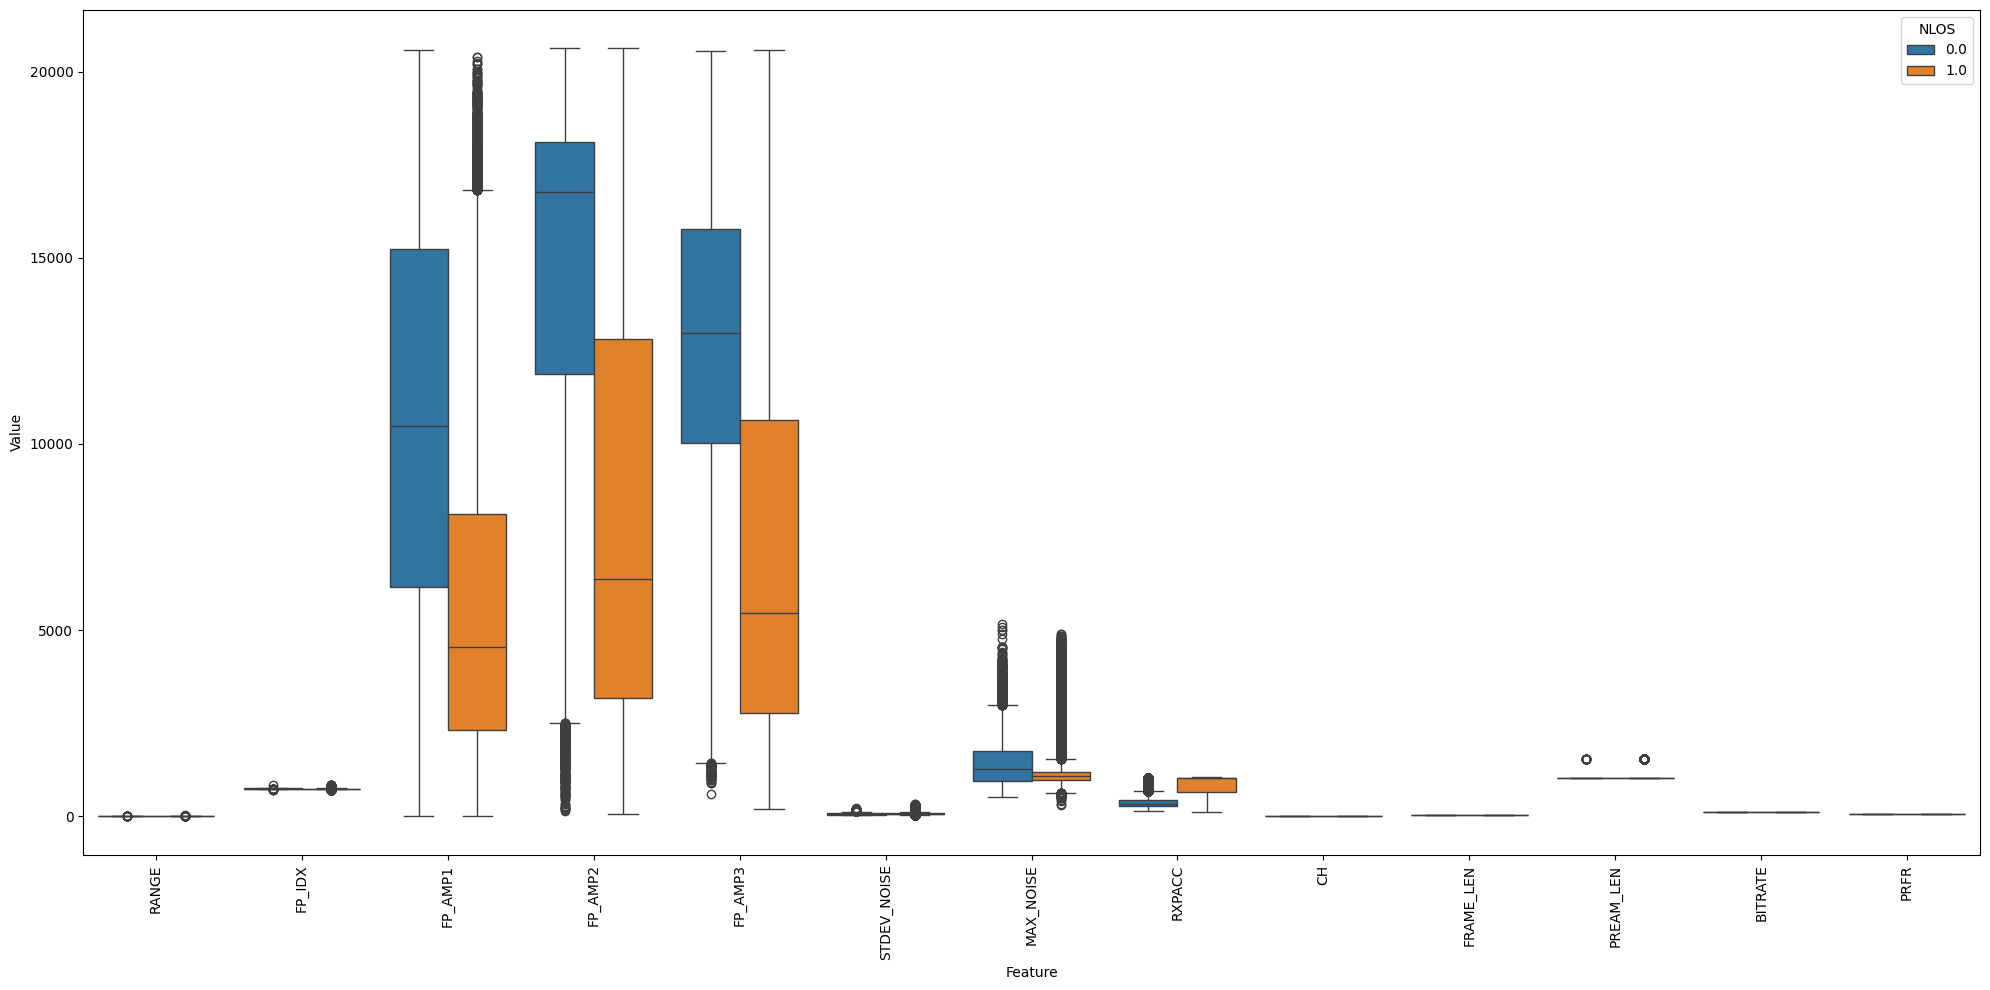

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the first 15 columns Drop the CIR_PWR column for better scaling visualization
temp_df = df.iloc[:, :15].drop(['CIR_PWR'], axis=1,).copy()

# Melt the dataframe to long format for seaborn boxplot
df_melted = pd.melt(temp_df, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(20, 10))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

CIR_PWR

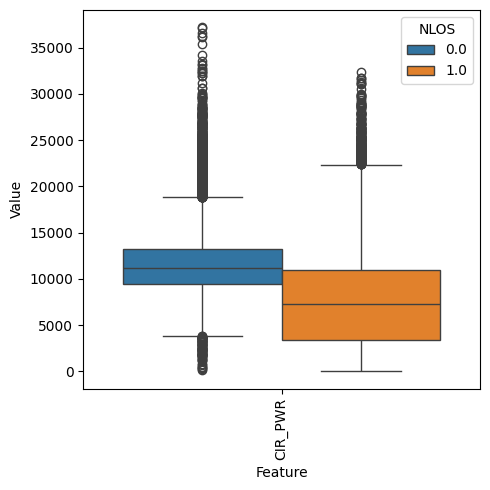

In [156]:
temp_df = df[['NLOS','CIR_PWR']].copy()

df_melted = pd.melt(temp_df, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

CIR PEAK VALUE AND EARLY ENERGY

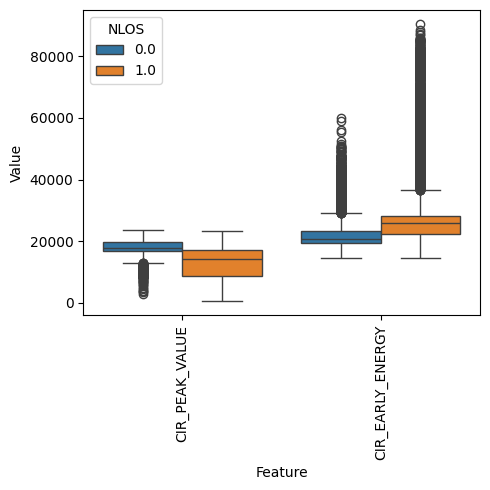

In [158]:
temp_df = pd.concat([df.iloc[:, :1], df.iloc[:, -7:]], axis=1).copy()
selected = temp_df[['NLOS','CIR_PEAK_VALUE','CIR_EARLY_ENERGY']]

df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

CIR MEAN AND KURTOSIS

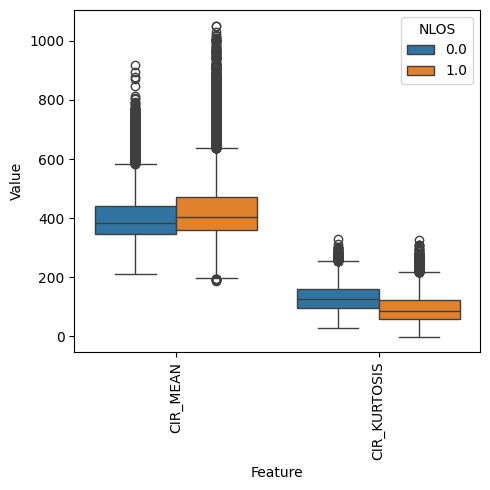

In [159]:
temp_df = pd.concat([df.iloc[:, :1], df.iloc[:, -7:]], axis=1).copy()
selected = temp_df[['NLOS','CIR_MEAN','CIR_KURTOSIS']]

df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

CIR SKEWNESS

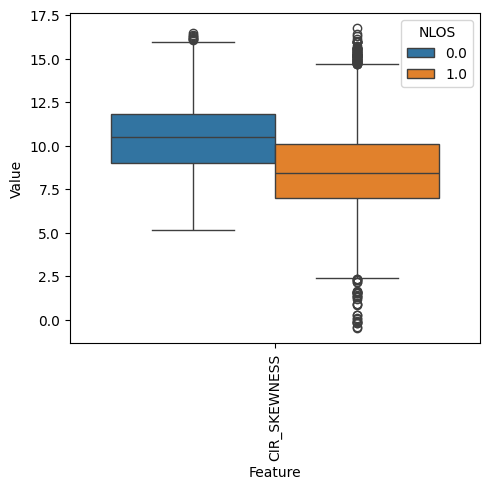

In [160]:
temp_df = pd.concat([df.iloc[:, :1], df.iloc[:, -7:]], axis=1).copy()
selected = temp_df[['NLOS','CIR_SKEWNESS']]

df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

CIR VARIANCE

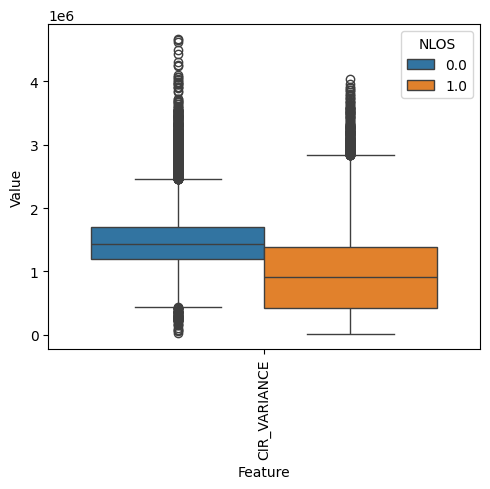

In [161]:
temp_df = pd.concat([df.iloc[:, :1], df.iloc[:, -7:]], axis=1).copy()
selected = temp_df[['NLOS','CIR_VARIANCE']]

df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Step 5. Feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler

temp_df = df.drop(columns='NLOS').copy()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(temp_df)

df_scaled = pd.DataFrame(scaled_features, columns=df.columns[1:])

df_scaled

df_scaled['NLOS'] = df['NLOS'].values

df_scaled.head()

,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,...,CIR1014,CIR1015,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY,CIR_MEAN,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS,NLOS
0,0.029067,-0.145210,1.962536,-0.188483,0.343387,-0.282570,0.420420,-0.599381,-0.017186,0.0,...,0.369232,-0.618518,1.585824,-0.225146,-0.273133,-0.225146,0.426998,0.463698,0.689655,0.0
1,-1.346176,0.742698,0.576919,-0.819882,-0.939065,-0.282570,1.868359,-0.314368,-0.551769,0.0,...,-1.030144,-0.618518,0.491321,0.305851,-0.514794,0.305851,2.304138,-0.452442,-0.713621,0.0
2,1.709919,0.076767,-0.699487,-0.991965,-1.169622,-0.419002,0.999351,-0.724719,0.347894,0.0,...,-0.241280,-0.618518,0.218677,0.952003,-0.478283,0.952003,1.001516,-1.091966,-1.098940,1.0
3,-0.149205,0.964675,0.069434,-0.482612,-0.718970,0.126726,-0.212049,-0.324669,1.329048,0.0,...,0.609322,1.136854,-0.014052,-0.031288,0.325646,-0.031288,-0.230115,-0.019714,-0.122373,1.0
4,-1.121213,0.076767,1.801780,1.069664,0.433443,-0.146138,0.323727,0.734689,-1.109168,0.0,...,0.266337,1.136854,0.823729,-0.571660,-0.448523,-0.571660,0.322257,1.016076,0.823891,0.0


Step 6. Feature selection

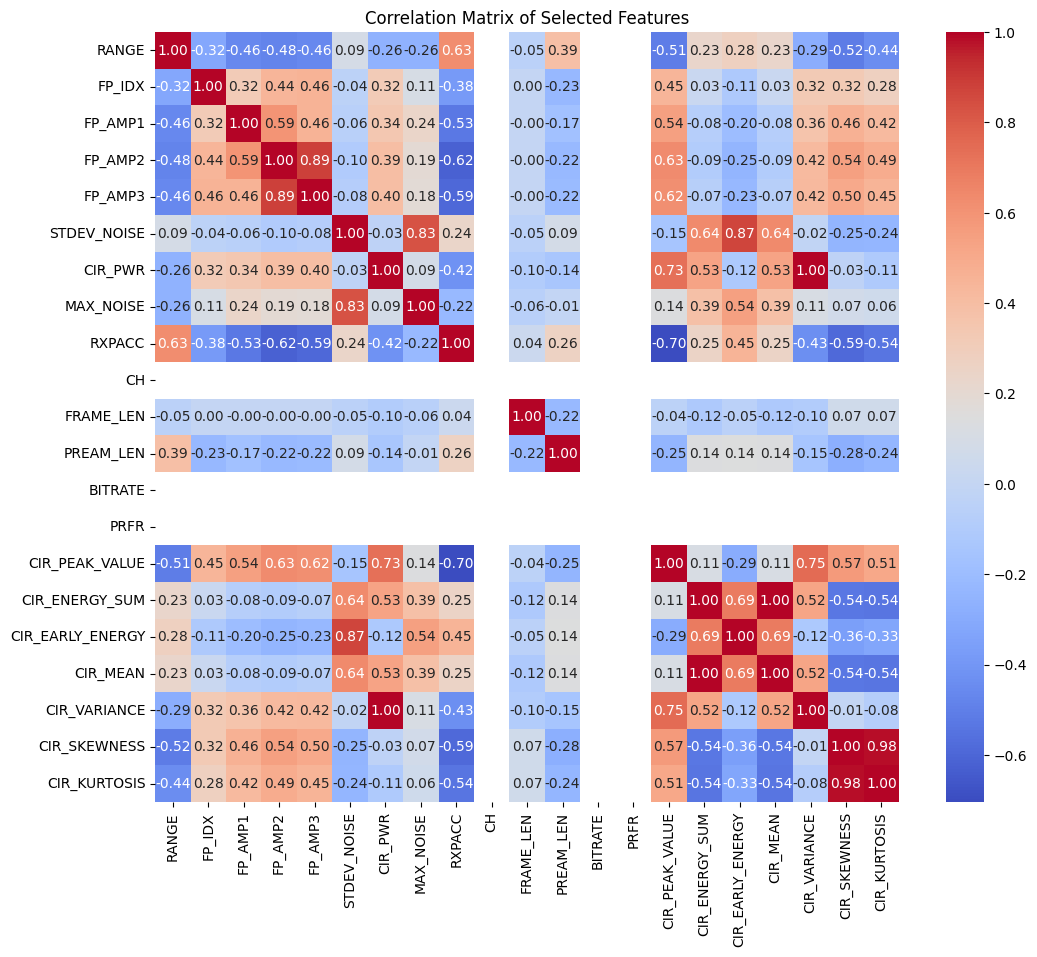

In [163]:
temp_df = pd.concat([df_scaled.iloc[:, :14], df_scaled.iloc[:, -8:]], axis=1).copy()
corr_df = temp_df.drop(columns='NLOS')
correlation_matrix = corr_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [106]:
from sklearn.ensemble import RandomForestClassifier

X = df_scaled.drop('NLOS', axis=1)
y = df_scaled['NLOS']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame based on feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
feature_importance_df.head(20)

,Feature,Importance
8,RXPACC,0.075506
1030,CIR_PEAK_VALUE,0.032972
0,RANGE,0.032226
7,MAX_NOISE,0.030541
3,FP_AMP2,0.026862
1034,CIR_VARIANCE,0.025986
6,CIR_PWR,0.023740
4,FP_AMP3,0.022215
2,FP_AMP1,0.017736
1032,CIR_EARLY_ENERGY,0.017532


Drop unwanted features

In [8]:
df_scaled.drop(['CH','FRAME_LEN','PREAM_LEN','BITRATE','PRFR','CIR_MEAN'], inplace=True, axis=1)

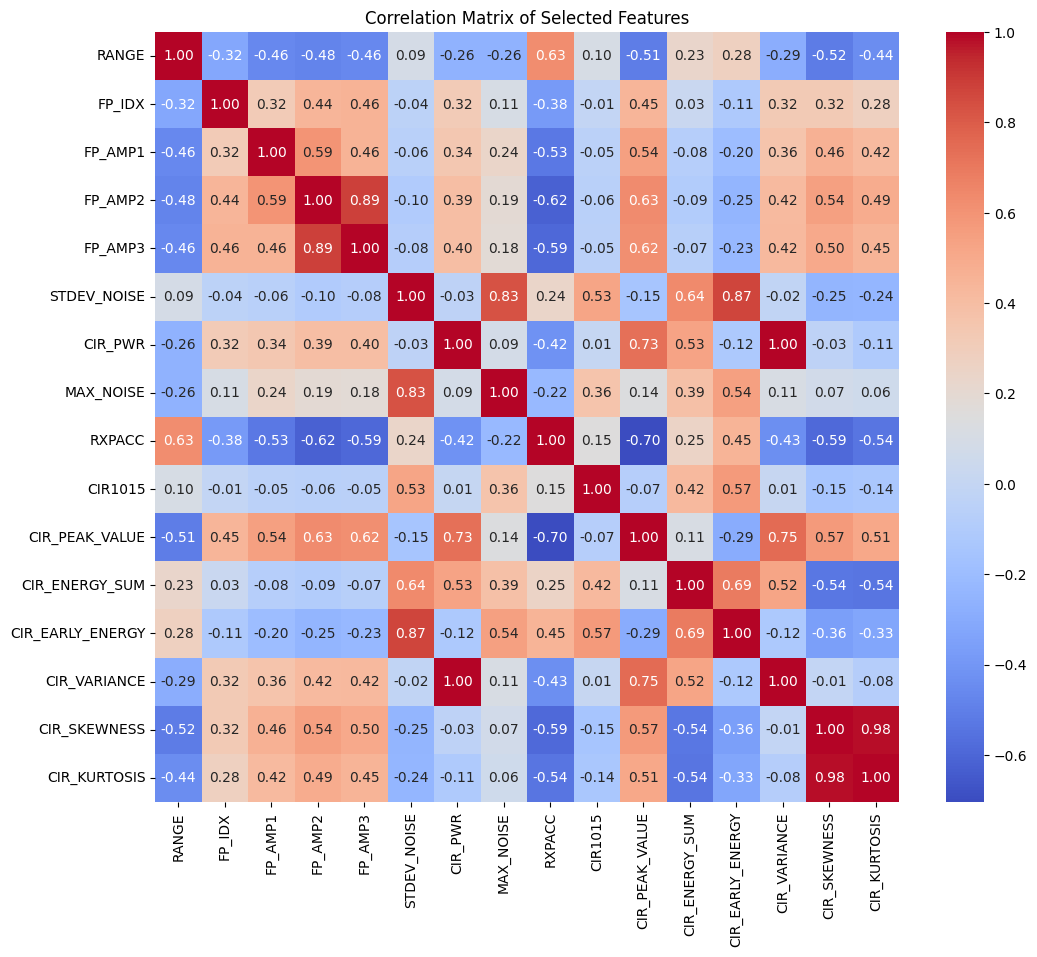

In [165]:
temp_df = pd.concat([df_scaled.iloc[:, :9], df_scaled.iloc[:, -8:]], axis=1).copy()
corr_df = temp_df.drop(columns='NLOS')
correlation_matrix = corr_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [103]:
from sklearn.ensemble import RandomForestClassifier

X = df_scaled.drop('NLOS', axis=1)
y = df_scaled['NLOS']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame based on feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
feature_importance_df.head(20)

,Feature,Importance
8,RXPACC,0.078645
1025,CIR_PEAK_VALUE,0.041055
7,MAX_NOISE,0.032050
6,CIR_PWR,0.030926
4,FP_AMP3,0.030748
1029,CIR_VARIANCE,0.030663
0,RANGE,0.029150
3,FP_AMP2,0.022195
1027,CIR_EARLY_ENERGY,0.017587
2,FP_AMP1,0.010863


At this point, we either drop all absolute CIR value columns or keep them, then apply PCA

Step 7. Dimension reduction

Method 1: Drop all CIR columns, then PCA

Based on current results, might not need to apply PCA for DF without absolute CIR values as it reduces it to only 8 features, not sure about this one

In [167]:
temp_df = pd.concat([df_scaled.iloc[:, :9], df_scaled.iloc[:, -8:]], axis=1).copy()
temp_df

,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CIR1015,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS,NLOS
0,0.029067,-0.145210,1.962536,-0.188483,0.343387,-0.282570,0.420420,-0.599381,-0.017186,-0.618518,1.585824,-0.225146,-0.273133,0.426998,0.463698,0.689655,0.0
1,-1.346176,0.742698,0.576919,-0.819882,-0.939065,-0.282570,1.868359,-0.314368,-0.551769,-0.618518,0.491321,0.305851,-0.514794,2.304138,-0.452442,-0.713621,0.0
2,1.709919,0.076767,-0.699487,-0.991965,-1.169622,-0.419002,0.999351,-0.724719,0.347894,-0.618518,0.218677,0.952003,-0.478283,1.001516,-1.091966,-1.098940,1.0
3,-0.149205,0.964675,0.069434,-0.482612,-0.718970,0.126726,-0.212049,-0.324669,1.329048,1.136854,-0.014052,-0.031288,0.325646,-0.230115,-0.019714,-0.122373,1.0
4,-1.121213,0.076767,1.801780,1.069664,0.433443,-0.146138,0.323727,0.734689,-1.109168,1.136854,0.823729,-0.571660,-0.448523,0.322257,1.016076,0.823891,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,-0.594886,-0.145210,0.896021,1.006797,0.973403,0.808886,0.040165,1.824952,-1.109168,-0.618518,0.396877,0.094591,0.215011,-0.028213,-0.029825,-0.020606,0.0
41996,-1.036322,-0.145210,-1.092570,0.587575,-0.176021,0.126726,0.563727,0.848008,-1.092870,-0.618518,1.266939,0.096410,-0.361172,0.592157,0.221646,0.231491,0.0
41997,0.699710,0.298744,-0.187738,-0.828061,-0.962980,-0.009706,-1.700701,-0.384763,1.329048,1.136854,-2.158998,-0.782331,0.246011,-1.713241,-0.255632,-0.259105,1.0
41998,-0.183162,-0.145210,-0.271732,-0.600167,-0.773153,-0.009706,-1.689302,-0.410517,1.329048,-0.618518,-1.787548,-1.275860,0.005590,-1.685608,0.551156,0.667573,1.0


In [171]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
X = temp_df.drop('NLOS', axis=1)
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=0.95) # Keep 95% of the variance
method1_pca = pca.fit_transform(X_scaled)

# The amount of variance that each principal component explains
variance_explained = pca.explained_variance_ratio_

# The cumulative variance explained by the principal components
cumulative_variance_explained = np.cumsum(variance_explained)

# The number of components
num_components = pca.n_components_

(num_components, cumulative_variance_explained)

(8,
 array([0.37691706, 0.60579447, 0.74384504, 0.79588246, 0.84098556,
        0.88210321, 0.91786089, 0.95207201]))

Method 2: Apply PCA directly

In [175]:
# Standardizing the data
scaler = StandardScaler()
X = df_scaled.drop('NLOS', axis=1)
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=0.95) # Keep 95% of the variance
method2_pca = pca.fit_transform(X_scaled)

# The amount of variance that each principal component explains
variance_explained = pca.explained_variance_ratio_

# The cumulative variance explained by the principal components
cumulative_variance_explained = np.cumsum(variance_explained)

# The number of components
num_components = pca.n_components_

(num_components, cumulative_variance_explained)

(866,
 array([0.21494619, 0.25750448, 0.27697219, 0.29262944, 0.30186391,
        0.3104306 , 0.31737149, 0.32283131, 0.32804212, 0.3327133 ,
        0.33667004, 0.34002901, 0.34324275, 0.34598918, 0.3486928 ,
        0.35110794, 0.35342687, 0.35565429, 0.35760882, 0.35947714,
        0.36124089, 0.36291413, 0.36448355, 0.36605171, 0.36756667,
        0.3689691 , 0.37034967, 0.3717023 , 0.37302658, 0.37433948,
        0.3756059 , 0.37686958, 0.37810731, 0.37933217, 0.38055146,
        0.38172616, 0.38289438, 0.384035  , 0.38516948, 0.38629694,
        0.38740702, 0.38851316, 0.3896095 , 0.39069675, 0.39177592,
        0.39284795, 0.39391733, 0.3949805 , 0.39603824, 0.39709372,
        0.39814685, 0.39918882, 0.40022637, 0.40126191, 0.40229324,
        0.40332188, 0.40434757, 0.40536989, 0.40639002, 0.40740308,
        0.40841563, 0.4094242 , 0.41042918, 0.41143029, 0.41243039,
        0.41342789, 0.41442262, 0.41541421, 0.41640366, 0.41739189,
        0.41837736, 0.41936048, 0.42034072

Final DF to be used

In [173]:
df_method1_pca = pd.DataFrame(method1_pca, columns=[f'PC{i+1}' for i in range(num_components)])
df_method1_pca['NLOS'] = df['NLOS'].values
df_method1_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,NLOS
0,-1.774865,-0.264790,-0.494558,-0.397702,-0.765832,-0.426480,0.840920,1.440519,0.0
1,-1.202072,1.058554,-2.544040,-1.412921,-0.025419,1.667391,-0.265557,0.565947,0.0
2,1.530474,0.395858,-2.827198,0.132770,-0.470972,0.475579,0.857417,0.185156,1.0
3,0.912167,0.240506,0.316694,0.907860,-0.536918,0.988877,-0.563190,0.822436,1.0
4,-2.769503,0.409746,1.131606,-0.585742,-0.575773,-0.391068,-1.081870,0.889172,0.0


In [176]:
df_method2_pca = pd.DataFrame(method2_pca, columns=[f'PC{i+1}' for i in range(num_components)])
df_method2_pca['NLOS'] = df['NLOS'].values
df_method2_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC858,PC859,PC860,PC861,PC862,PC863,PC864,PC865,PC866,NLOS
0,-5.456753,-4.929303,-2.060837,-1.202392,-0.810167,-2.107765,0.985264,-1.702771,-0.363002,-1.757790,...,-0.069757,0.871722,-0.222513,-0.291578,0.123100,0.151777,0.528267,-0.760915,0.246699,0.0
1,-9.976484,0.816966,-0.482929,-3.405078,-5.447108,1.164407,-1.914444,-4.666460,3.827500,0.365409,...,-0.148598,-0.837627,0.127947,0.337373,-0.326663,-0.155096,0.360643,0.481808,0.314369,0.0
2,-3.139570,11.878356,0.017896,2.706428,-3.405742,1.653777,-1.967625,0.289058,0.842273,0.971484,...,-0.551275,-0.191376,0.513805,-0.750356,0.089437,-1.225977,-0.900374,1.070134,0.070653,1.0
3,3.891840,-4.839279,-0.571242,2.497812,-3.687200,-1.936632,-2.807178,2.388670,3.293308,3.517372,...,0.733350,-0.443303,-0.564408,0.067617,-0.367464,-0.465007,-0.182165,0.033664,-1.175119,1.0
4,-7.316778,-3.485891,1.959701,-0.607204,3.368475,-1.341722,0.343606,2.986329,2.774937,-3.389278,...,0.639171,0.376626,0.233216,-0.325433,-0.002247,-0.316925,0.300169,0.475784,-1.060228,0.0


DF Without PCA

In [11]:
df_method3 = pd.concat([df_scaled.iloc[:, :9], df_scaled.iloc[:, -8:]], axis=1).copy()
df_method3.head()

,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CIR1015,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS,NLOS
0,0.029067,-0.145210,1.962536,-0.188483,0.343387,-0.282570,0.420420,-0.599381,-0.017186,-0.618518,1.585824,-0.225146,-0.273133,0.426998,0.463698,0.689655,0.0
1,-1.346176,0.742698,0.576919,-0.819882,-0.939065,-0.282570,1.868359,-0.314368,-0.551769,-0.618518,0.491321,0.305851,-0.514794,2.304138,-0.452442,-0.713621,0.0
2,1.709919,0.076767,-0.699487,-0.991965,-1.169622,-0.419002,0.999351,-0.724719,0.347894,-0.618518,0.218677,0.952003,-0.478283,1.001516,-1.091966,-1.098940,1.0
3,-0.149205,0.964675,0.069434,-0.482612,-0.718970,0.126726,-0.212049,-0.324669,1.329048,1.136854,-0.014052,-0.031288,0.325646,-0.230115,-0.019714,-0.122373,1.0
4,-1.121213,0.076767,1.801780,1.069664,0.433443,-0.146138,0.323727,0.734689,-1.109168,1.136854,0.823729,-0.571660,-0.448523,0.322257,1.016076,0.823891,0.0
